In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [42]:
from datetime import datetime

In [2]:
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')

In [3]:
df = pd.DataFrame(date_rng, columns=['date'])

In [35]:
X.shape

(366,)

In [43]:
datetime(2020, 1, 5)

datetime.datetime(2020, 1, 5, 0, 0)

In [57]:
pd.to_datetime('2020-1-5').day_of_year

5

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   price   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [68]:
dates = ('2020-01-05', '2020-04-05', '2020-07-05', '2020-10-05')

In [115]:
dt = pd.concat([df.date.dt.day_of_year - pd.to_datetime(date).day_of_year for date in dates], axis=1)
dt = np.abs(np.max(dt, axis=1))

In [126]:
dt

0        4
1        3
2        2
3        1
4        0
      ... 
361    357
362    358
363    359
364    360
365    361
Length: 366, dtype: int64

In [110]:
(10-np.cosh(dt)).clip(0, None)

0      0.000000
1      0.000000
2      6.237804
3      8.456919
4      9.000000
         ...   
361    0.000000
362    0.000000
363    0.000000
364    0.000000
365    0.000000
Length: 366, dtype: float64

In [ ]:
np.max(df.date.dt.day_of_year - pd.to_datetime('2020-1-5').day_of_year, axis=1)

In [46]:
(df.date[0] - datetime(2018, 1, 5)).days

726

1/cosh(x)

log(x)

sinc(x)

tanh(x)

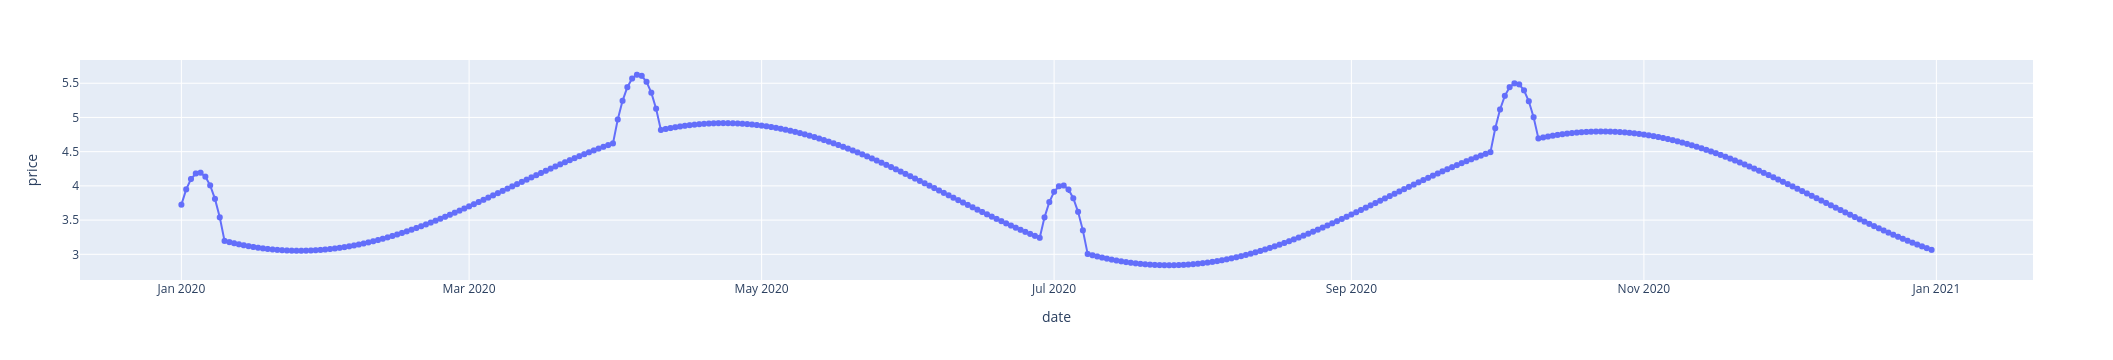

In [190]:
def season(x, scale=1.0, freq=1.0, bias=0.0):
    """ Крупная сезонная периодичность
    scale*cos(freq*x + bias)
    """
    return scale*np.cos(freq*X + bias)

def periodic(x):
    return 0

def reports(x_dates, window_radius=5, report_dates=('2020-01-05', '2020-04-05', '2020-07-03', '2020-10-05')):
    # Объединяем в один датафрейм различия с каждой датой
    dt = pd.concat([x_dates.dt.day_of_year - pd.to_datetime(date).day_of_year for date in report_dates], axis=1)
    # считаем растояние до ближайшей даты отчета
    dt = 0.1*np.min(np.abs(dt), axis=1).clip(0, window_radius)
    # считаем гиперболический от растояния до даты отчета
    dt = (10 - 7*np.cosh(dt)).clip(0, None)
    return dt

def linear(x, k=1.0, b=0.0):
    """y = kx + b"""
    return k*x + b

def random_walk(x, low=0.0, high=1.0):
    return np.random.uniform(low=low, high=high, size=len(x))


def unexpected_days(days=('2020-01-05'))


def other(x):
    return 1/(np.log1p(x)+1)

X = np.linspace(0, 1, num=len(date_rng))
parts = [
    linear(X, k=0.075, b=1),
    season(X, scale=1, freq=4*np.pi, bias=3*np.pi/4),
    reports(df.date),
    #periodic(X),
    #random_walk(X),
    #np.sin(2*X)
    other(X)
]
df['price'] = sum(parts)

fig = px.line(df, x='date', y='price', markers=True)
fig.show()

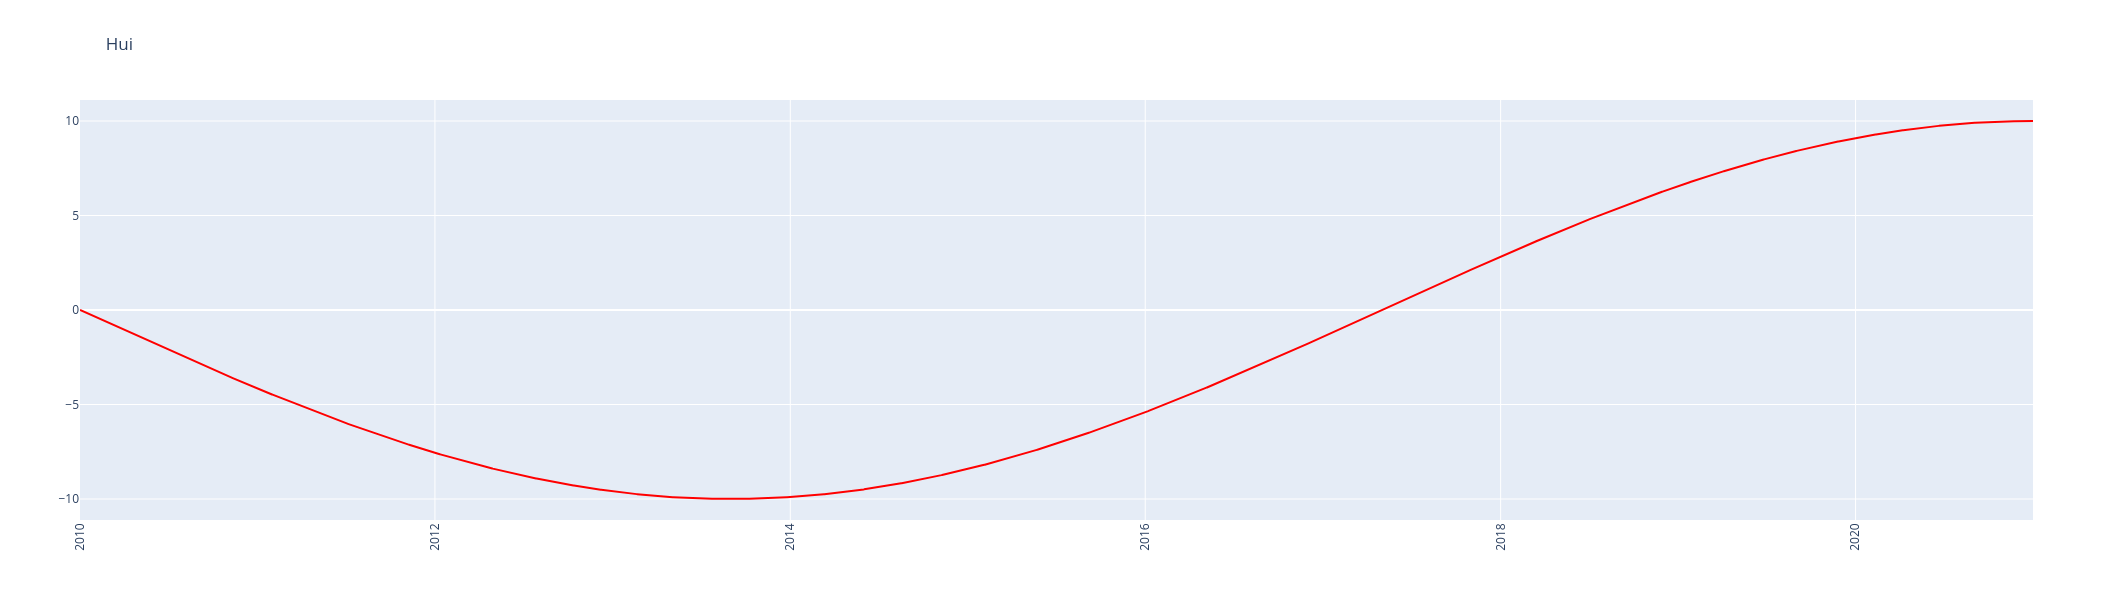

In [13]:
title = 'Stock prices history'
trace1 = go.Line(
    x=df['date'],
    y=df['price'],
    name='Line',
    marker=dict(
        color='red'
    )
)
trace2 = go.Scatter(
    x=df['date'],
    y=df['price'],
    name='Scatter',
    yaxis='y2',
    marker=dict(
        color='blue'
    )
    
)

fig = make_subplots()
fig.add_trace(trace1)
#fig.add_trace(trace2)
fig['layout'].update(height = 600, width = 800, title = 'Hui',xaxis=dict(
      tickangle=-90
))
fig.show()

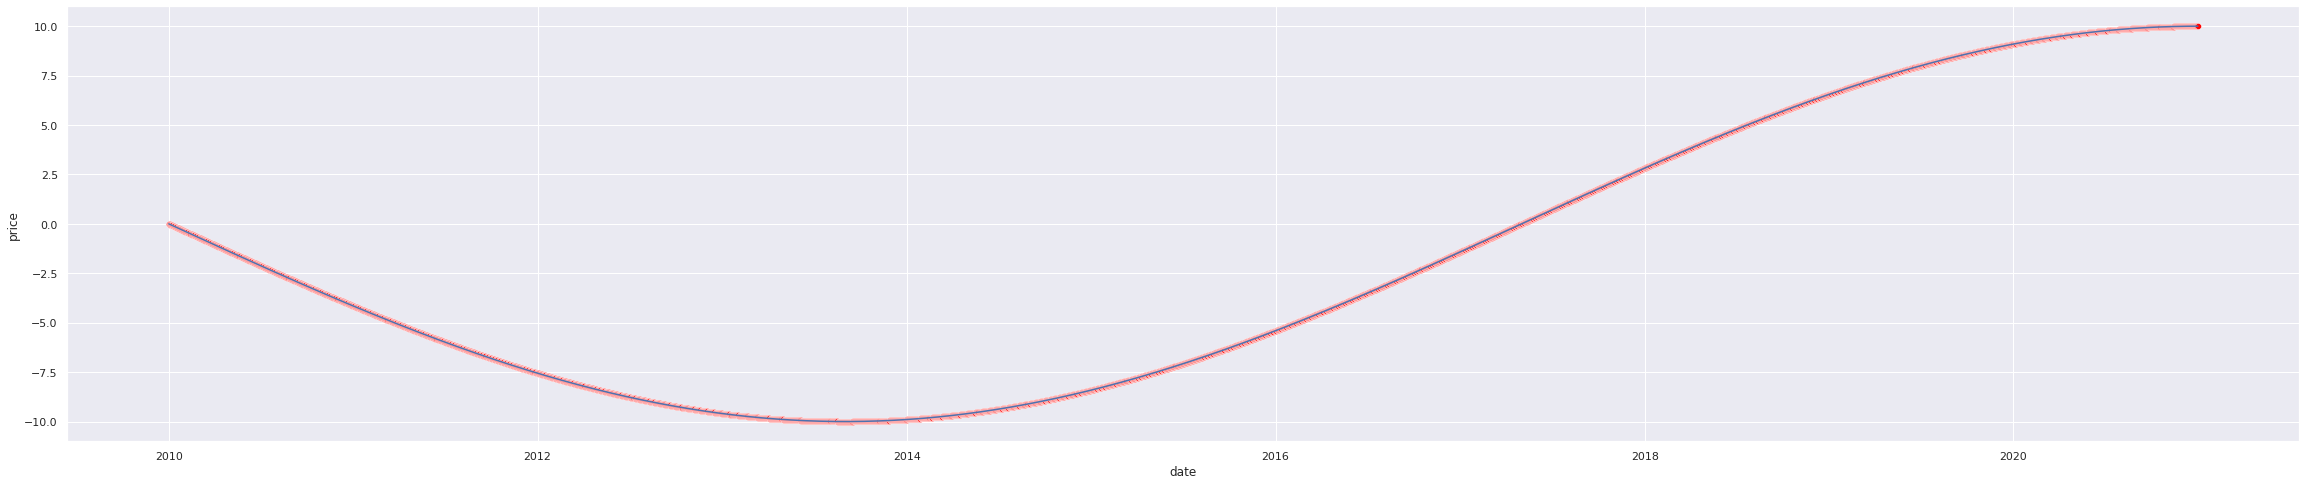

In [12]:
plt.figure(figsize=(40,8))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df, x='date', y='price')
g = sns.scatterplot(data=df, x='date', y='price', color='red')

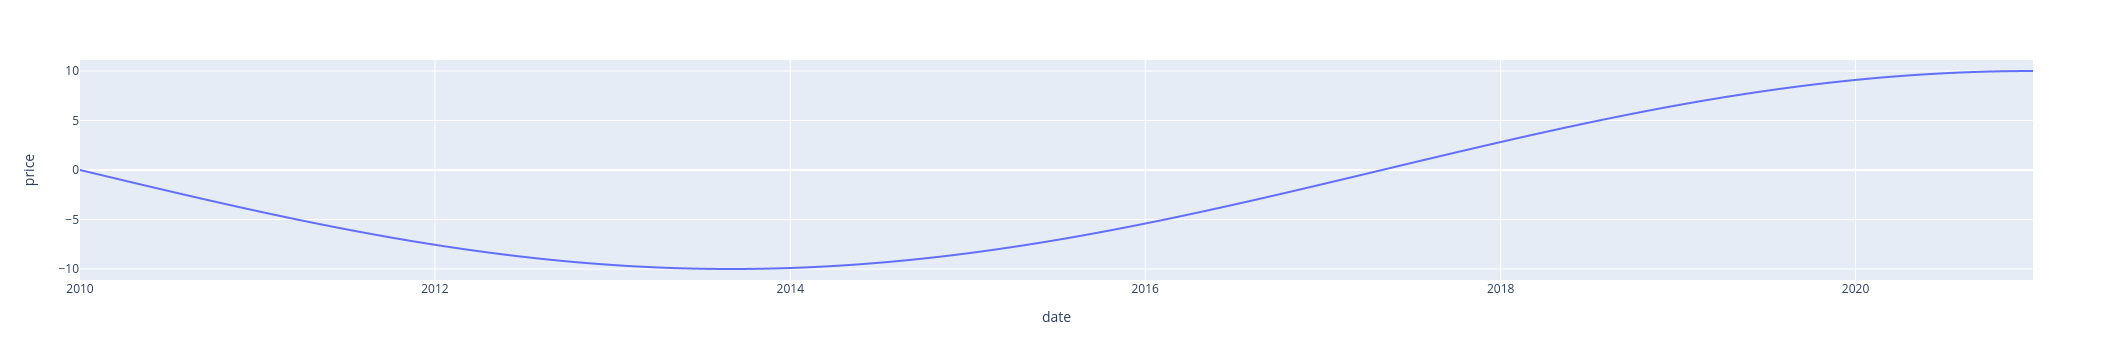

In [13]:
fig = px.line(df, x='date', y='price')
fig.show()

In [7]:
st = px.data.stocks()
st

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472
